<a href="https://colab.research.google.com/github/kibet-brian-ronoh/ChamaSys/blob/master/SMSSpamNb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection

df = pd.read_table('SMSSpamCollection',sep='\t',names=['label','message'])

# Output printing out first 5 columns
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


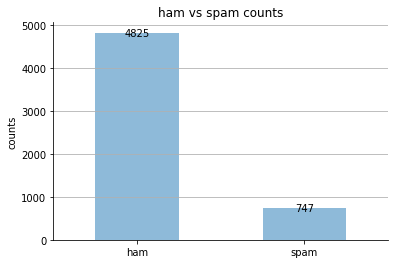

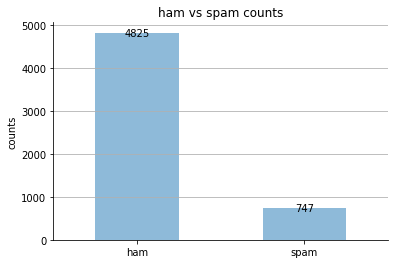

In [22]:
#visualize ham vs spam counts
fig = plt.figure()
ax = fig.add_subplot(111)
df['label'].value_counts().plot(kind='bar', alpha=0.5, grid=True)
plt.ylabel('counts')
plt.title('ham vs spam counts')
plt.xticks(rotation='horizontal')
ax.xaxis.grid(which="major")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')

In [24]:
#lowering case characters and stripping punctuation of texts
from string import punctuation
def preprocess1 (str):
    """ str --> str
    lower case and strip punctuations of a string
    """
    for p in list(punctuation):
        str = str.lower().replace(p, '')
    return str
df['texts'] = df.message.apply(preprocess1)

#creating word count feature as "word_count"
def word_count (str):
    """str --> int
    return the number of words appeared in a string
    """
    return len(str.split())
df['word_count'] = df.message.apply(word_count)

#creating character count feature as "char_count"
def char_count (str):
    """ str --> int
    return the number of character count of a string
    """
    return len(list(str))
df['char_count'] = df.message.apply(char_count)

#vew new data set
print(df.shape)
df.head()

(5572, 5)


,label,message,texts,word_count,char_count
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,20,111
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,13,61


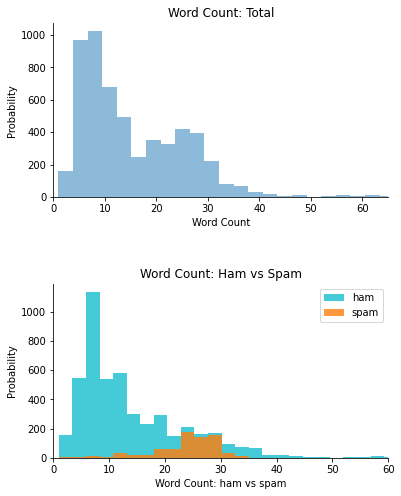

In [28]:
#visualize word_count
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(df['word_count'], bins=60, color='#1f77b4', alpha=0.5)
plt.xlim(0,65)
plt.xlabel('Word Count')
plt.ylabel('Probability')
plt.title('Word Count: Total')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((df.loc[df.label=='ham']['word_count'], df.loc[df.label=='spam']['word_count'])), bins=70)[1]
plt.hist(df.loc[df.label=='ham']['word_count'], bins, color='#17becf', alpha=0.8, label='ham')
plt.hist(df.loc[df.label=='spam']['word_count'], bins, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 60)
plt.xlabel('Word Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Word Count: Ham vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

In [32]:
ham_word_count = df.loc[df.label=='ham']['word_count']
spam_word_count = df.loc[df.label=='spam']['word_count']
from scipy import stats
print ('mean-ham:', ham_word_count.mean())
print ('mean-spam:', spam_word_count.mean())
print('stand-deviation-ham:', ham_word_count.std())
print('stand-deviation-spam:', spam_word_count.std())

mean-ham: 14.310259067357514
mean-spam: 23.91164658634538
stand-deviation-ham: 11.517944595924813
stand-deviation-spam: 5.7801741991963125


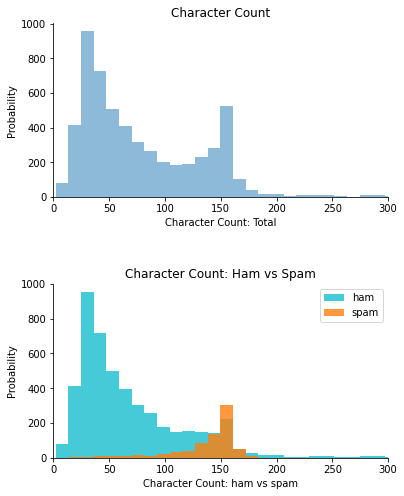

In [38]:


#visualize char_count
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.hist(df['char_count'], bins=80, color='#1f77b4', alpha=0.5)
plt.xlim(0,300)
plt.xlabel('Character Count: Total')
plt.ylabel('Probability')
plt.title('Character Count')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((df.loc[df.label=='ham']['char_count'], df.loc[df.label=='spam']['char_count'])), bins=80)[1]
plt.hist(df.loc[df.label=='ham']['char_count'], bins, color='#17becf', alpha=0.8, label='ham')
plt.hist(df.loc[df.label=='spam']['char_count'], bins, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 300)
plt.xlabel('Character Count: ham vs spam')
plt.ylabel('Probability')
plt.title('Character Count: Ham vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

In [39]:
ham_char_count = df.loc[df.label=='ham']['char_count']
spam_char_count = df.loc[df.label=='spam']['char_count']
print ('mean-ham:', ham_char_count.mean())
print ('mean-spam:', spam_char_count.mean())
print('stand-deviation-ham:', ham_char_count.std())
print('stand-deviation-spam:', spam_char_count.std())

mean-ham: 71.48248704663213
mean-spam: 138.6706827309237
stand-deviation-ham: 58.44065247020555
stand-deviation-spam: 28.873603350548084


In [40]:
# dummy code variable
df = pd.get_dummies(df, columns=['label'])
#identify explaining variables and target variable
y = df[['label_spam']]
X = df[['word_count']]
#split data into training and test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
#apply LogisticRegression classfier
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
print (lg.coef_)
print('training set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_train, y_train)))
print('test set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_test, y_test)))

[[0.12510449]]
training set score obtained Logistic Regression: 0.77
test set score obtained Logistic Regression: 0.77


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
y_pred = lg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[755 226]
 [ 25 109]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86       981
           1       0.33      0.81      0.46       134

    accuracy                           0.77      1115
   macro avg       0.65      0.79      0.66      1115
weighted avg       0.89      0.77      0.81      1115



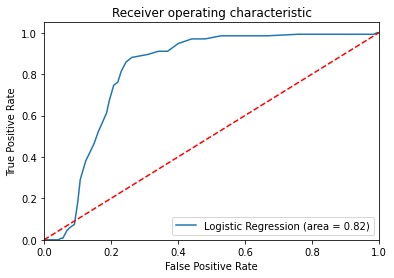

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lg.predict_proba(X_test)[: ,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
# print(thresholds)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [45]:
# #dummy code "label"
# sms = pd.get_dummies(sms, columns=['label'])

#identify explaining variables and target variable
X_c = df[['char_count']]
y_c = df[['label_spam']]
#split data into training and test data sets
from sklearn.model_selection import train_test_split
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.2)

#apply LogisticRegression classfier
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(class_weight='balanced').fit(X_c_train, y_c_train)
print('training set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_c_train, y_c_train)))
print('test set score obtained Logistic Regression: {:.2f}'.format(lg.score(X_c_test, y_c_test)))

training set score obtained Logistic Regression: 0.80
test set score obtained Logistic Regression: 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
print ("Confusionn Matrix:")
y_c_pred = lg.predict(X_c_test)
y_c_pred_arr = y_c_pred.tolist()
y_c_test_arr = np.array(y_c_test.label_spam).tolist()
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_c_test, y_c_pred)
# matrix = confusion_matrix(y_c_test_arr, y_c_pred_arr)
print(confusion_matrix)
print ("Classification Report: ")
print(classification_report(y_c_test, y_c_pred))

Confusionn Matrix:
[[766 200]
 [ 16 133]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.79      0.88       966
           1       0.40      0.89      0.55       149

    accuracy                           0.81      1115
   macro avg       0.69      0.84      0.71      1115
weighted avg       0.90      0.81      0.83      1115



**Bag of words**

number of features:8421


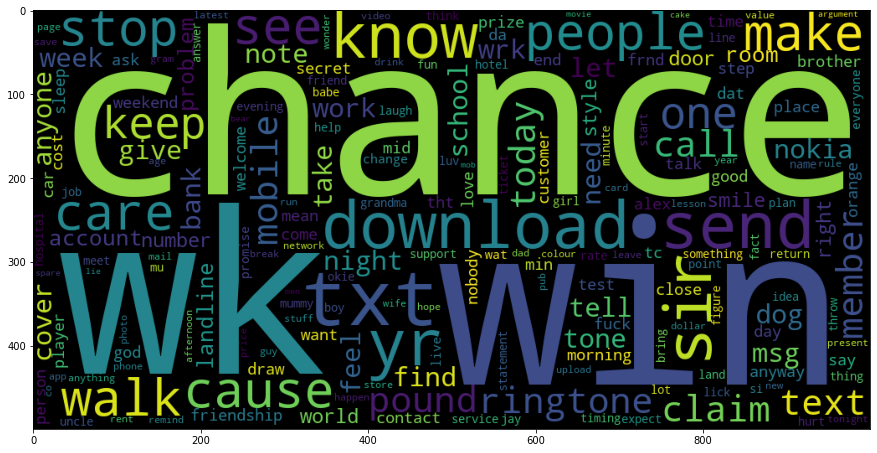

Best cross validation score: 0.98
Best parameters: {'C': 10}
Test score:0.99


In [47]:
#identify explaining variables and target variable
X_b = df['texts']
y_b = df['label_ham']

#split data into training and test data sets
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2)

#tokenization and vocabulary building over all documents
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_b_train)

print ('number of features:{}'.format(len(vect.vocabulary_)))

#visualize with wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(vect.vocabulary_))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.show()

#tokenization and vocabulary building over all training data set
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_b_train)

#sparse matrix encoding, resulting in one vector of word counts for each document.
X_b_train = vect.transform(X_b_train)

#import LogisticRegression classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#grid search for best parameter
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_b_train, y_b_train)
print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
print ('Best parameters:', grid.best_params_)

#fit classifier in test dataset
X_b_test = vect.transform(X_b_test)
print('Test score:{:.2f}'.format(grid.score(X_b_test, y_b_test)))

number of features:1495


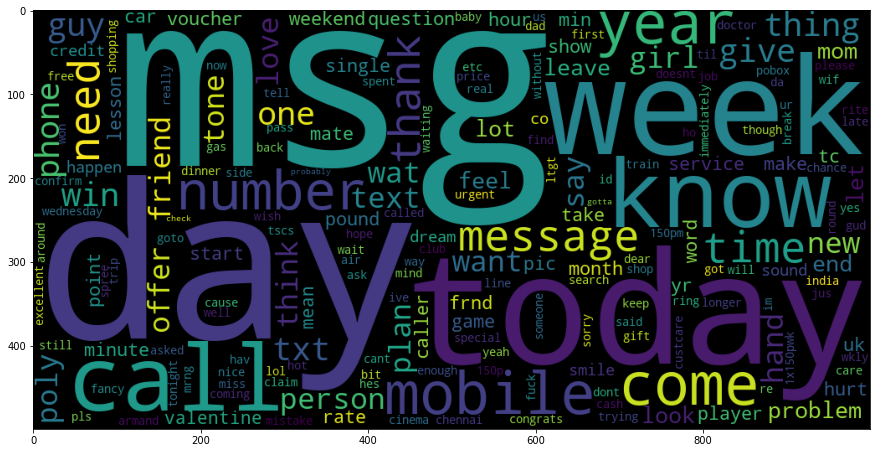

Best cross validation score: 0.98
Parameters: {'C': 10}
Test score:0.99


In [49]:
#improve the model by selecting tokens that appear in at least 5 documents
X_b = df['texts']
y_b = df['label_ham']
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, y_b, test_size=0.2)
vect = CountVectorizer(min_df=5).fit(X_b_train)
X_b_train = vect.transform(X_b_train)

print ('number of features:{}'.format(len(vect.vocabulary_)))

#visualize features
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(vect.vocabulary_))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.show()

#fit in logistic regression
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_b_train, y_b_train)
print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
print ('Parameters:', grid.best_params_)
X_b_test = vect.transform(X_b_test)
print('Test score:{:.2f}'.format(grid.score(X_b_test, y_b_test)))